<a href="https://colab.research.google.com/github/Aravinda89/emotion/blob/main/Emotion_Recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Emotion Classification

!pip install fastai==2.0.15
!pip install fastai2==0.0.30
!pip install fastcore==1.0.16
!pip install fastai --upgrade

from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

     |████████████████████████████████| 185 kB 5.7 MB/s 
     |████████████████████████████████| 56 kB 2.7 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 179 kB 5.5 MB/s 
     |████████████████████████████████| 40 kB 3.7 MB/s 
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.3.27
    Uninstalling fastcore-1.3.27:
      Successfully uninstalled fastcore-1.3.27
     |████████████████████████████████| 189 kB 5.0 MB/s 
  Using cached fastcore-1.3.27-py3-none-any.whl (56 kB)
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.0.16
    Uninstalling fastcore-1.0.16:
      Successfully uninstalled fastcore-1.0.16
  Attempting uninstall: fastai
    Found existing installation: fastai 2.0.15
    Uninstalling fastai-2.0.15:
      Successfully uninstalled fastai-2.0.15
Mounted at /content/gdriv

In [2]:
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *

import numpy as np
from fastcore.xtras import Path # @patch'd properties to the Pathlib module

from fastai.callback.fp16 import to_fp16
from fastai.callback.schedule import fit_one_cycle, lr_find 

from fastai.data.block import CategoryBlock, DataBlock
from fastai.data.external import untar_data, URLs
from fastai.data.transforms import get_image_files, Normalize, RandomSplitter, RegexLabeller

from fastai.interpret import ClassificationInterpretation
from fastai.learner import Learner # imports @patch'd properties to Learner including `save`, `load`, `freeze`, and `unfreeze`

from fastai.metrics import error_rate

from fastai.vision.augment import aug_transforms, RandomResizedCrop
from fastai.vision.core import imagenet_stats
from fastai.vision.data import ImageDataLoaders, ImageBlock
from fastai.vision.learner import cnn_learner

from torchvision.models.resnet import resnet34, resnet50

In [3]:
import glob

In [22]:
cd /content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/

/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images


In [23]:
ls

train/  validation/


In [24]:
# !unzip archive.zip -d emotion/

In [36]:
path_train = '/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/train'

In [33]:
train_imgs = glob.glob(path_train+'*/*.jpg')

In [34]:
len(train_imgs)

28821

In [28]:
test_imgs = glob.glob('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/validation/*/*.jpg')

In [29]:
len(test_imgs)

7066

In [41]:
path = Path(path_train)
path

Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/train')

In [42]:
path.ls()

(#7) [Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/train/angry'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/train/disgust'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/train/fear'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/train/happy'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/train/neutral'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/train/sad'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/train/surprise')]

In [43]:
fns = get_image_files(path)
len(fns)

28821

In [44]:
fns[:3]

(#3) [Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/train/angry/6168.jpg'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/train/angry/33713.jpg'),Path('/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/train/angry/34360.jpg')]

/content/gdrive/MyDrive/DataSets/emotion_recog/emotion/images/images/train/angry/15465.jpg


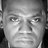

In [75]:
fname = random.choice(list(fns))
print(fname)
im = Image.open(fname)
im

In [62]:
im.shape

(48, 48)

In [76]:
emotion_dblk = DataBlock(
                          blocks=(ImageBlock, CategoryBlock), 
                          get_items=get_image_files, 
                          splitter=RandomSplitter(valid_pct=0.2, seed=42),
                          get_y=parent_label,
                          item_tfms=Resize(48) )

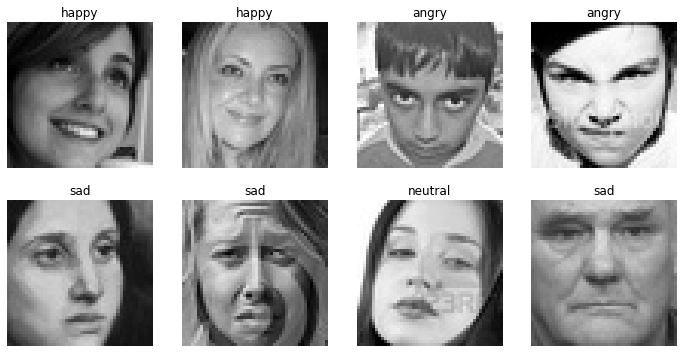

In [77]:
emotion_dblks = emotion_dblk.new(item_tfms=Resize(48, ResizeMethod.Squish))
# cars = cars.new(item_tfms=Resize(224, ResizeMethod.Squish), batch_tfms=aug_transforms(mult=2))
dls = emotion_dblks.dataloaders(path)

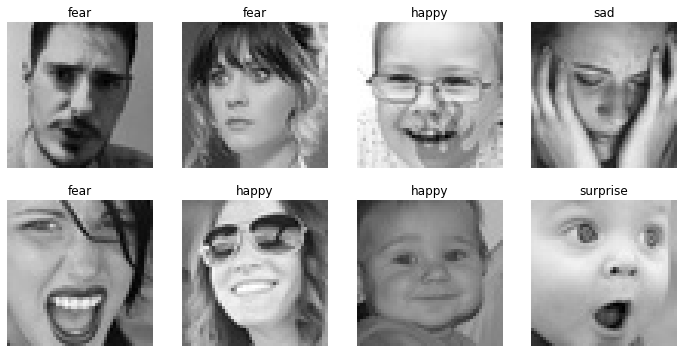

In [78]:
dls.train.show_batch(max_n=8, nrows=2, unique=False)